In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("innings_deliveries.csv")
df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,NaN,NaN,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,NaN,NaN,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,NaN,NaN,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,NaN,NaN,[]
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,NaN,NaN,[]
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,NaN,NaN,[]


In [16]:
df.shape

(247, 11)

In [17]:
df.isnull().sum()

team             0
over             0
batter           0
bowler           0
non_striker      0
runs_batter      0
runs_extras      0
runs_total       0
player_out     228
wicket_kind    228
fielders         0
dtype: int64

In [18]:
df.dtypes

team           object
over            int64
batter         object
bowler         object
non_striker    object
runs_batter     int64
runs_extras     int64
runs_total      int64
player_out     object
wicket_kind    object
fielders       object
dtype: object

In [ ]:

#1. Clean the dataset
df['player_out'] = df['player_out'].fillna('Not Out') 
df['wicket_kind'] = df['wicket_kind'].fillna('None')

In [20]:
df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,player_out,wicket_kind,fielders
0,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,Not Out,None,[]
1,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,1,0,1,Not Out,None,[]
2,Royal Challengers Bengaluru,0,F du Plessis,I Sharma,V Kohli,1,0,1,Not Out,None,[]
3,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,0,0,0,Not Out,None,[]
4,Royal Challengers Bengaluru,0,V Kohli,I Sharma,F du Plessis,2,0,2,Not Out,None,[]
...,...,...,...,...,...,...,...,...,...,...,...
242,Delhi Capitals,18,Kuldeep Yadav,Mohammed Siraj,I Sharma,1,0,1,Not Out,None,[]
243,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,1,1,Not Out,None,[]
244,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,Not Out,None,[]
245,Delhi Capitals,18,I Sharma,Mohammed Siraj,Kuldeep Yadav,0,0,0,Not Out,None,[]


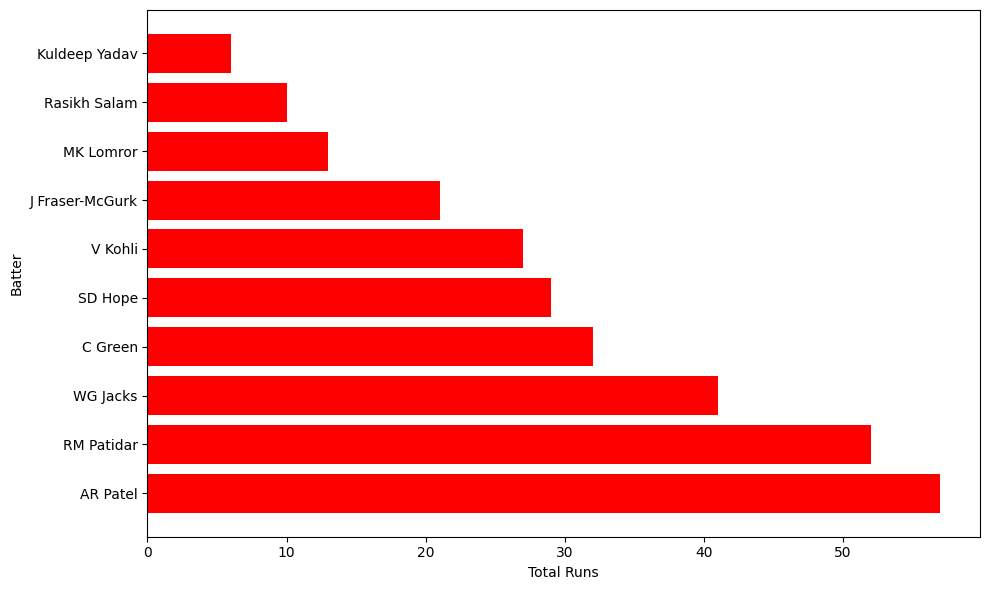

In [ ]:
#3. Top run contributors
top_batters = df.groupby('batter')['runs_batter'].sum().sort_values(ascending=False).head(10) 
plt.figure(figsize=(10,6))
plt.barh(y=top_batters.index, width= top_batters.values, color= 'red')
plt.xlabel("Total Runs")
plt.ylabel("Batter")
plt.tight_layout()
plt.show()

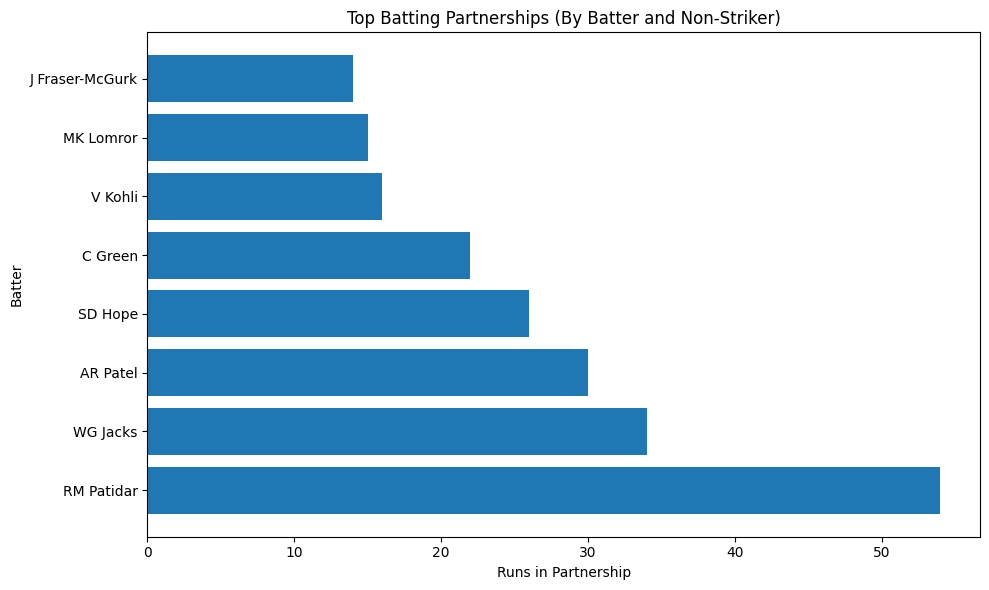

In [22]:
#6. Partnership Analysis
partnerships = df.groupby(['team','batter','non_striker'])['runs_total'].sum().reset_index() 
top_partnerships = partnerships.sort_values(by='runs_total', ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(y= top_partnerships['batter'], width= top_partnerships['runs_total'])
plt.title("Top Batting Partnerships (By Batter and Non-Striker)")
plt.xlabel("Runs in Partnership")
plt.ylabel("Batter")
plt.tight_layout()
plt.show()

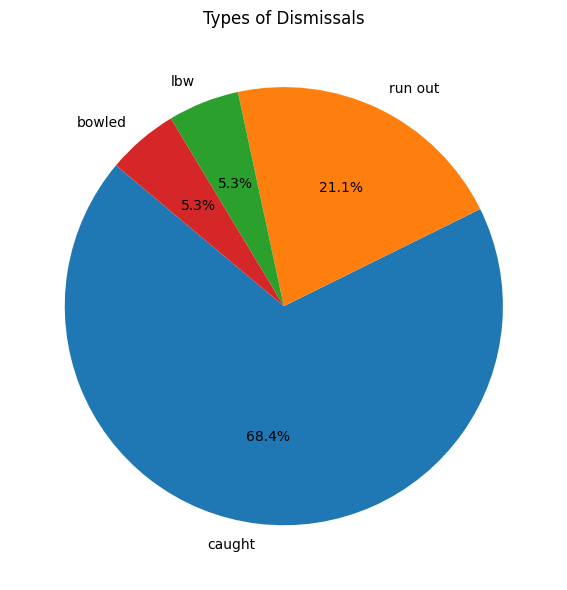

In [32]:
# 5. Pie Chart: Dismissal Types
dismissal_counts = df[df['wicket_kind'] != 'None']['wicket_kind'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(dismissal_counts, labels=dismissal_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Types of Dismissals")
plt.tight_layout()
plt.show()

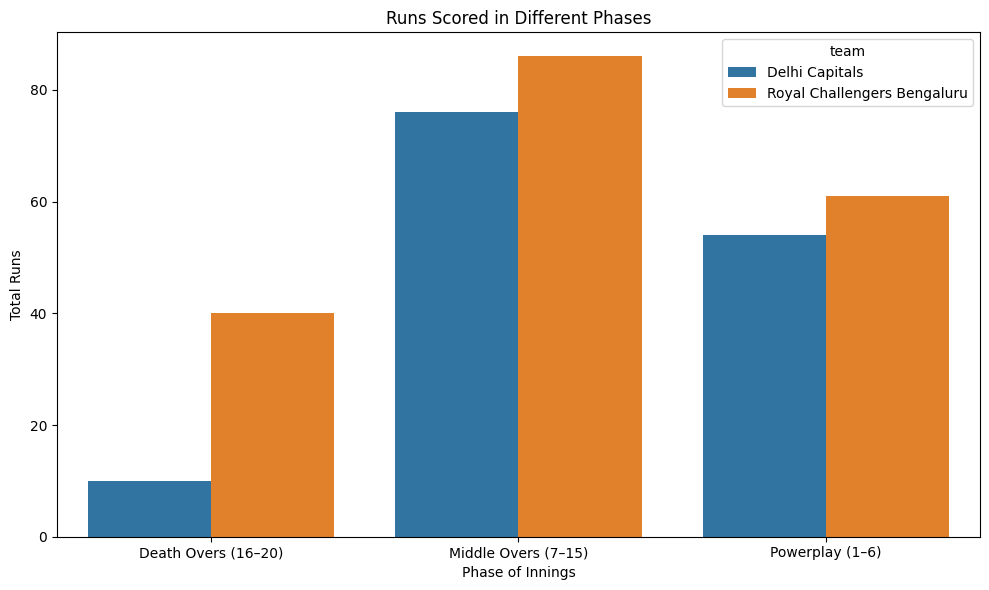

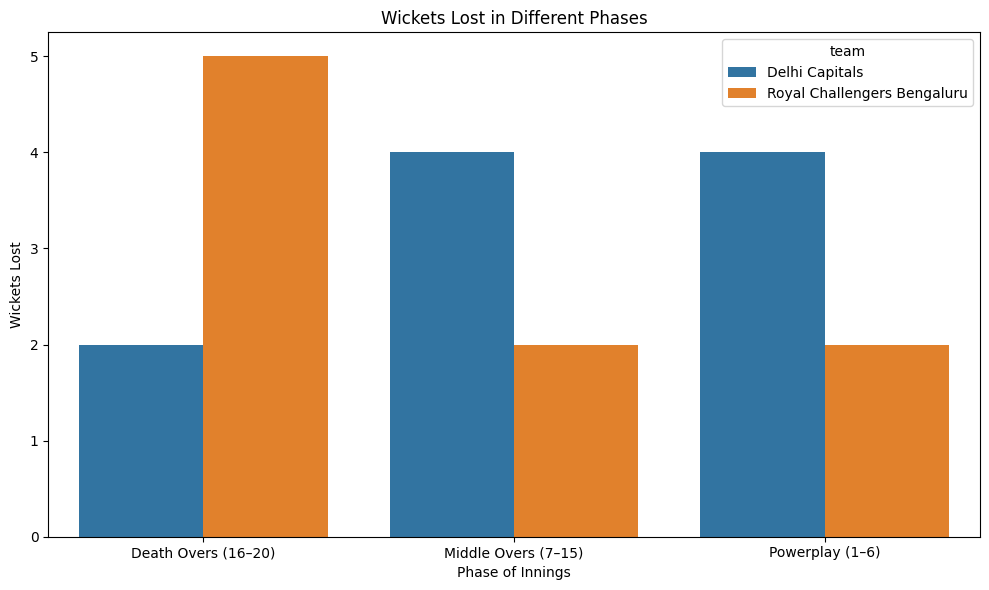

In [31]:
# 7. Phase Analysis
def phase(over):
    if over <= 5:
        return 'Powerplay (1–6)'
    elif over <= 15:
        return 'Middle Overs (7–15)'
    else:
        return 'Death Overs (16–20)'

df['phase'] = df['over'].apply(phase)

phase_analysis = df.groupby(['team','phase']).agg(total_runs=('runs_total','sum'), wickets=('player_out', lambda x: (x!='Not Out').sum())).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=phase_analysis, x='phase', y='total_runs', hue='team')
plt.title("Runs Scored in Different Phases")
plt.xlabel("Phase of Innings")
plt.ylabel("Total Runs")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.barplot(data=phase_analysis, x='phase', y='wickets', hue='team')
plt.title("Wickets Lost in Different Phases")
plt.xlabel("Phase of Innings")
plt.ylabel("Wickets Lost")
plt.tight_layout()
plt.show()


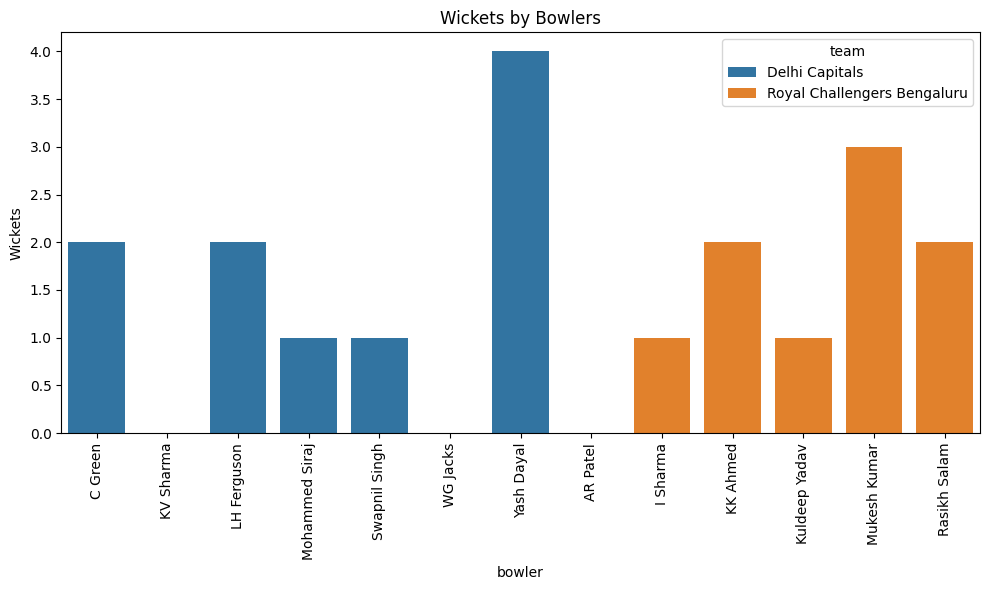

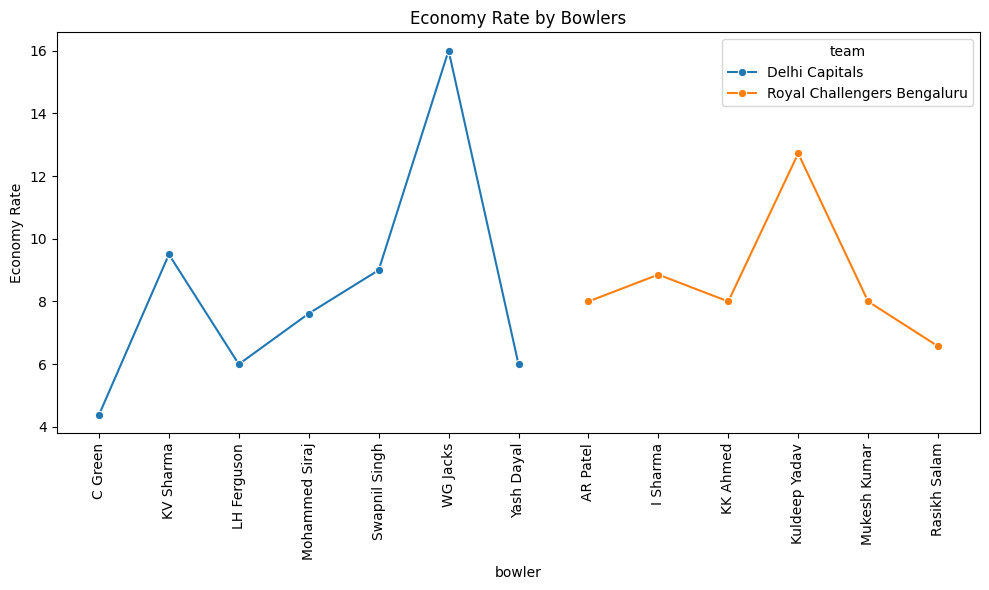

In [ ]:
# 4 Bowling performance (Wickets & Economy Rate)
bowling_stats = df.groupby(['team','bowler']).agg(
    balls=('over','count'),
    runs_given=('runs_total','sum'),
    wickets=('player_out', lambda x: (x!='Not Out').sum())
).reset_index()

bowling_stats['economy_rate'] = bowling_stats['runs_given'] / (bowling_stats['balls'] / 6)

plt.figure(figsize=(10,6))
sns.barplot(data=bowling_stats, x='bowler', y='wickets', hue='team')
plt.xticks(rotation=90)
plt.ylabel("Wickets")
plt.title("Wickets by Bowlers")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=bowling_stats, x='bowler', y='economy_rate', hue='team', marker="o")
plt.xticks(rotation=90)
plt.ylabel("Economy Rate")
plt.title("Economy Rate by Bowlers")
plt.tight_layout()
plt.show()

In [26]:
# 8 strike rate for each batter / print 10 batters
strike_rate = df.groupby(['batter']).agg(
    runs=('runs_batter','sum'),
    balls=('batter','count')
).reset_index()
strike_rate['strike_rate'] = (strike_rate['runs'] / strike_rate['balls']) * 100
top_strike = strike_rate.sort_values(by='strike_rate', ascending=False).head(10)

print("Top 10 Batters by Strike Rate:")
print(top_strike[['batter','strike_rate']])

Top 10 Batters by Strike Rate:
             batter  strike_rate
6   J Fraser-McGurk   262.500000
18          V Kohli   192.857143
13       RM Patidar   152.941176
8         KV Sharma   150.000000
0          AR Patel   142.500000
19         WG Jacks   136.666667
2           C Green   133.333333
11        MK Lomror   130.000000
15          SD Hope   120.833333
4      F du Plessis    85.714286


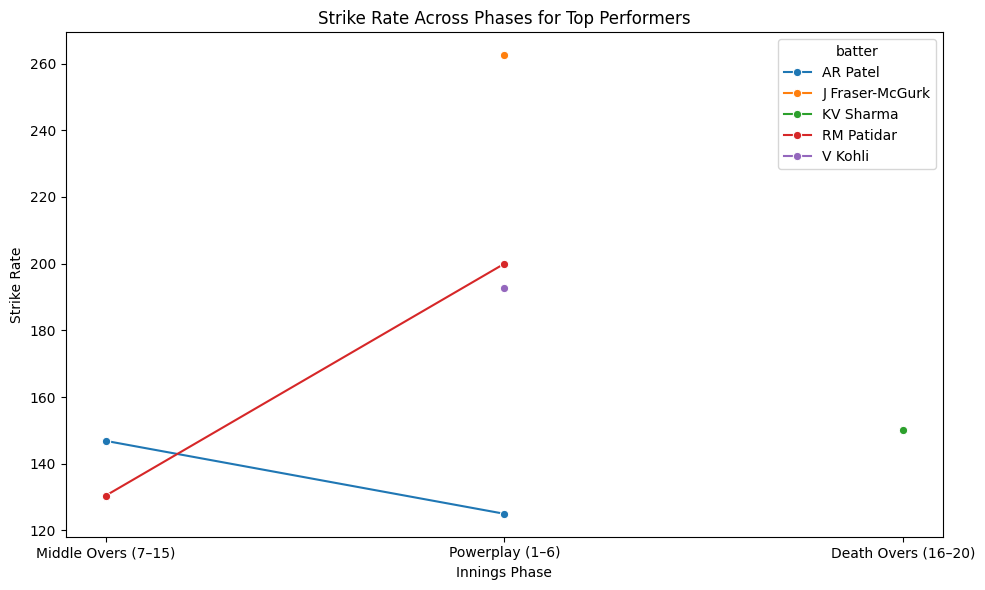

In [ ]:
# 9. strike rate across different phases for top performances
strike_phase = df.groupby(['batter','phase']).agg(
    runs=('runs_batter','sum'),
    balls=('batter','count')
).reset_index()
strike_phase['strike_rate'] = (strike_phase['runs'] / strike_phase['balls']) * 100

top_batters_names = top_strike['batter'].head(5)
plt.figure(figsize=(10,6))
sns.lineplot(data=strike_phase[strike_phase['batter'].isin(top_batters_names)], 
             x='phase', y='strike_rate', hue='batter', marker='o')
plt.title("Strike Rate Across Phases for Top Performers")
plt.xlabel("Innings Phase")
plt.ylabel("Strike Rate")
plt.tight_layout()
plt.show()


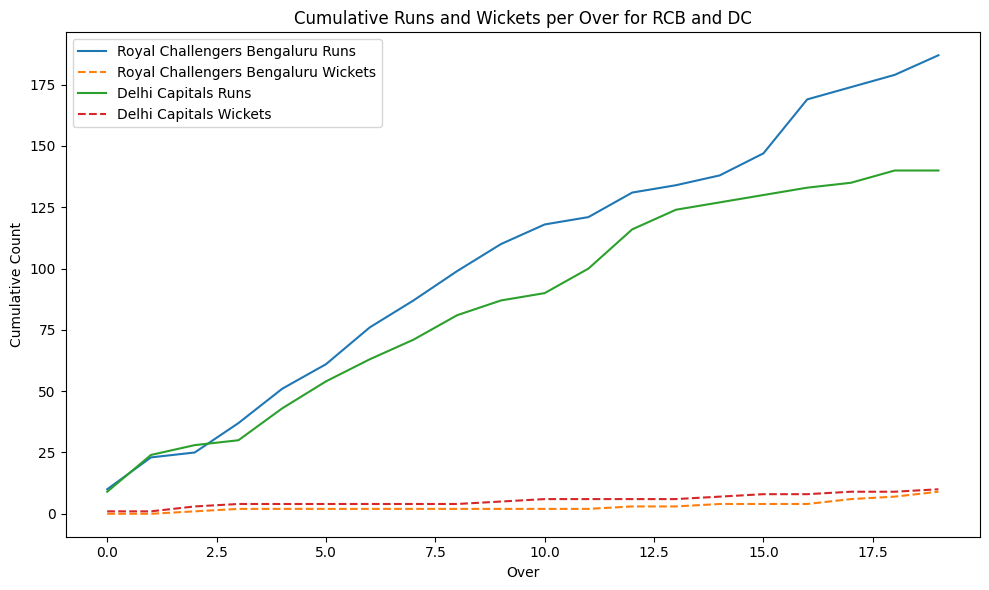

In [ ]:
# 10. Cumulative Runs with Wickets (RCB vs DC)
teams = df['team'].unique()
plt.figure(figsize=(10,6))
for team in teams:
    team_data = df[df['team'] == team]
    team_data = team_data.groupby('over').agg({
        'runs_total':'sum',
        'player_out':lambda x: (x!='Not Out').sum()
    }).cumsum()
    plt.plot(team_data.index, team_data['runs_total'], label=f"{team} Runs")
    plt.plot(team_data.index, team_data['player_out'], '--', label=f"{team} Wickets")

plt.title("Cumulative Runs and Wickets per Over for RCB and DC")
plt.xlabel("Over")
plt.ylabel("Cumulative Count")
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_14192\4216842591.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='over', y='runs_total', hue='team', estimator='sum', ci=None)


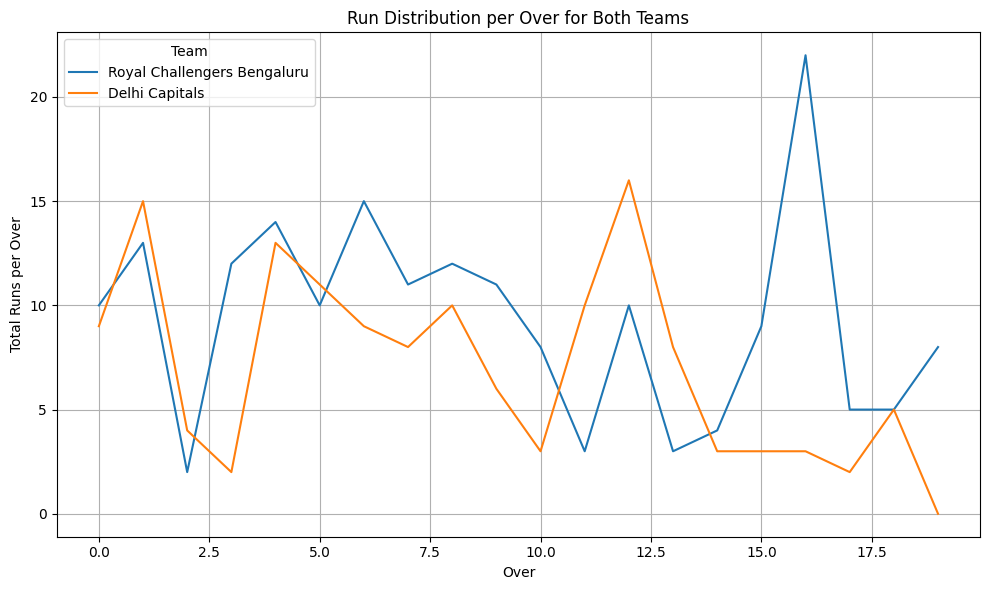

In [34]:
# 2. Run distribution per over for both teams

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='over', y='runs_total', hue='team', estimator='sum', ci=None)
plt.title("Run Distribution per Over for Both Teams")
plt.xlabel("Over")
plt.grid()
plt.ylabel("Total Runs per Over")
plt.legend(title="Team")
plt.tight_layout()
plt.show()